In [1]:
#Read in the Texas Demographic Data and Texas Police Agencies Data and import modules
import pandas as pd
import numpy as np

tx_county_demographics = pd.read_csv("TX_Demographics_2019.csv")
tx_county_demographics.head()

,Year,Area Name,Area Code,Age,Total Pop Total,Total Pop Male,Total Pop Female,White Total,White Male,White Female,...,Black Female,Hispanic Total,Hispanic Male,Hispanic Female,Asian Total,Asian Male,Asian Female,Other Total,Other Male,Other Female
0,2019,Anderson,1,< 10,"5,826","3,018","2,808","2,822","1,455","1,367",...,494,"1,399",730,669,32,16,16,516,254,262
1,2019,Anderson,1,10-19,"6,580","3,557","3,023","3,698","1,974","1,724",...,436,"1,633",907,726,47,28,19,254,136,118
2,2019,Anderson,1,20-29,"8,262","5,594","2,668","4,181","2,589","1,592",...,379,"1,815","1,229",586,33,17,16,182,87,95
3,2019,Anderson,1,30-39,"9,932","7,198","2,734","4,761","2,975","1,786",...,408,"2,240","1,756",484,58,36,22,84,50,34
4,2019,Anderson,1,40-49,"8,936","6,427","2,509","4,406","2,776","1,630",...,351,"1,928","1,478",450,64,31,33,83,38,45


In [2]:
tx_county_demographics[["PRCT_WHITE","PRCT_BLACK","PRCT_HISPANIC","PRCT_OTHER"]] = ""

tx_county_demographics = tx_county_demographics.replace(',','', regex=True)

tx_county_demographics['Total Pop Total'] = tx_county_demographics['Total Pop Total'].astype(int, errors = 'raise')
tx_county_demographics['White Total'] = tx_county_demographics['White Total'].astype(int, errors = 'raise')
tx_county_demographics["PRCT_WHITE"] = (tx_county_demographics["White Total"]/tx_county_demographics["Total Pop Total"])*100
tx_county_demographics['Black Total'] = tx_county_demographics['Black Total'].astype(int, errors = 'raise')
tx_county_demographics["PRCT_BLACK"] = (tx_county_demographics["Black Total"]/tx_county_demographics["Total Pop Total"])*100
tx_county_demographics['Hispanic Total'] = tx_county_demographics['Hispanic Total'].astype(int, errors = 'raise')
tx_county_demographics["PRCT_HISPANIC"] = (tx_county_demographics["Hispanic Total"]/tx_county_demographics["Total Pop Total"])*100
tx_county_demographics['Asian Total'] = tx_county_demographics['Asian Total'].astype(int, errors = 'raise')
tx_county_demographics['Other Total'] = tx_county_demographics['Other Total'].astype(int, errors = 'raise')
tx_county_demographics["PRCT_OTHER"] = (tx_county_demographics['Asian Total']+tx_county_demographics['Other Total'])/tx_county_demographics["Total Pop Total"]*100

tx_county_demographics= tx_county_demographics[['Area Name','Age','Total Pop Total',"PRCT_WHITE","PRCT_BLACK","PRCT_HISPANIC","PRCT_OTHER"]]

tx_county_demographics.head()

,Area Name,Age,Total Pop Total,PRCT_WHITE,PRCT_BLACK,PRCT_HISPANIC,PRCT_OTHER
0,Anderson,< 10,5826,48.438036,18.142808,24.013045,9.406111
1,Anderson,10-19,6580,56.200608,14.407295,24.817629,4.574468
2,Anderson,20-29,8262,50.605180,24.824498,21.968046,2.602275
3,Anderson,30-39,9932,47.935965,28.080950,22.553363,1.429722
4,Anderson,40-49,8936,49.306177,27.473142,21.575649,1.645031


In [ ]:
tx_county_demographics.to_csv("pop_info.csv")

In [3]:
arrests_age_df = pd.read_csv('df_2.csv')
arrests_age_df = arrests_age_df[['COUNTY_NAME', 'ARR_Total', 'ARR_10to19', 'ARR_20to29', 'ARR_30to39',
       'ARR_40to49', 'ARR_50to59', 'ARR_60to69', 'ARR_70to79', 'ARR_80to89',
       'ARR_90to95up', 'ARR_under10', 'ARR_10to19PRC', 'ARR_20to29PRC',
       'ARR_30to39PRC', 'ARR_40to49PRC', 'ARR_50to59PRC', 'ARR_60to69PRC',
       'ARR_70to79PRC', 'ARR_80to89PRC', 'ARR_90to95upPRC', 'ARR_under10PRC']]
arrests_age_df.head()

,COUNTY_NAME,ARR_Total,ARR_10to19,ARR_20to29,ARR_30to39,ARR_40to49,ARR_50to59,ARR_60to69,ARR_70to79,ARR_80to89,...,ARR_10to19PRC,ARR_20to29PRC,ARR_30to39PRC,ARR_40to49PRC,ARR_50to59PRC,ARR_60to69PRC,ARR_70to79PRC,ARR_80to89PRC,ARR_90to95upPRC,ARR_under10PRC
0,Anderson,1025,123,372,283,120,90,32,5,0,...,1200.000000,3629.268293,2760.975610,1170.731707,878.048781,312.195122,48.780488,0.000000,0.0,0.0
1,Andrews,496,143,144,118,64,22,5,0,0,...,2883.064516,2903.225806,2379.032258,1290.322581,443.548387,100.806452,0.000000,0.000000,0.0,0.0
2,Angelina,7,1,2,2,2,0,0,0,0,...,1428.571429,2857.142857,2857.142857,2857.142857,0.000000,0.000000,0.000000,0.000000,0.0,0.0
3,Aransas,165,16,40,50,20,24,14,1,0,...,969.696970,2424.242424,3030.303030,1212.121212,1454.545455,848.484848,60.606061,0.000000,0.0,0.0
4,Atascosa,1148,108,392,362,188,60,30,7,1,...,940.766550,3414.634146,3153.310105,1637.630662,522.648084,261.324042,60.975610,8.710801,0.0,0.0


In [4]:
tx_county_demographics_grp = tx_county_demographics.groupby(['Area Name']).mean()
tx_county_demographics_grp.head()

,Total Pop Total,PRCT_WHITE,PRCT_BLACK,PRCT_HISPANIC,PRCT_OTHER
Area Name,,,,,
Anderson,5902.5,63.366648,18.773197,14.945701,2.914455
Andrews,1927.9,43.251142,1.734433,53.077050,1.937375
Angelina,9098.9,64.894526,13.997494,18.643746,2.464235
Aransas,2371.0,66.756711,1.109108,28.344344,3.789836
Archer,922.8,86.319193,0.542438,9.834631,3.303739


In [5]:
county_arr_df = pd.merge(tx_county_demographics_grp,arrests_age_df,left_on='Area Name',right_on='COUNTY_NAME')
county_arr_df.dropna(inplace=True)
county_arr_df['ARR_RATE_per10k'] = (county_arr_df['ARR_Total']/county_arr_df['Total Pop Total']*10000).round(decimals=0)
county_arr_df.head(15)

,Total Pop Total,PRCT_WHITE,PRCT_BLACK,PRCT_HISPANIC,PRCT_OTHER,COUNTY_NAME,ARR_Total,ARR_10to19,ARR_20to29,ARR_30to39,...,ARR_20to29PRC,ARR_30to39PRC,ARR_40to49PRC,ARR_50to59PRC,ARR_60to69PRC,ARR_70to79PRC,ARR_80to89PRC,ARR_90to95upPRC,ARR_under10PRC,ARR_RATE_per10k
0,5902.5,63.366648,18.773197,14.945701,2.914455,Anderson,1025,123,372,283,...,3629.268293,2760.975610,1170.731707,878.048781,312.195122,48.780488,0.000000,0.0,0.0,1737.0
1,1927.9,43.251142,1.734433,53.077050,1.937375,Andrews,496,143,144,118,...,2903.225806,2379.032258,1290.322581,443.548387,100.806452,0.000000,0.000000,0.0,0.0,2573.0
2,9098.9,64.894526,13.997494,18.643746,2.464235,Angelina,7,1,2,2,...,2857.142857,2857.142857,2857.142857,0.000000,0.000000,0.000000,0.000000,0.0,0.0,8.0
3,2371.0,66.756711,1.109108,28.344344,3.789836,Aransas,165,16,40,50,...,2424.242424,3030.303030,1212.121212,1454.545455,848.484848,60.606061,0.000000,0.0,0.0,696.0
4,5089.8,38.106547,0.633862,59.804979,1.454612,Atascosa,1148,108,392,362,...,3414.634146,3153.310105,1637.630662,522.648084,261.324042,60.975610,8.710801,0.0,0.0,2255.0
5,3206.7,63.987528,9.236194,24.685273,2.091005,Austin,489,94,194,127,...,3967.280164,2597.137014,797.546012,531.697341,184.049080,0.000000,0.000000,0.0,0.0,1525.0
6,711.3,37.354464,1.586393,59.239906,1.819236,Bailey,2,1,0,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5000.0,0.0,28.0
7,2312.9,76.170692,0.500884,20.678217,2.650206,Bandera,145,16,40,41,...,2758.620690,2827.586207,1655.172414,1103.448276,482.758621,68.965517,0.000000,0.0,0.0,627.0
8,8956.4,56.772761,6.985594,33.553787,2.687858,Bastrop,413,75,118,113,...,2857.142857,2736.077482,1259.079903,895.883777,387.409201,24.213075,24.213075,0.0,0.0,461.0
9,375.1,82.176968,1.887159,13.257766,2.678106,Baylor,154,27,47,49,...,3051.948052,3181.818182,1168.831169,519.480520,259.740260,64.935065,0.000000,0.0,0.0,4106.0


In [6]:
tx_county_agencies = pd.read_csv("2020_agencies.csv")
tx_county_agencies = tx_county_agencies[['AGENCY_ID','COUNTY_NAME','MALE_OFFICER','FEMALE_OFFICER']]
tx_county_agencies['COUNTY_NAME'] = tx_county_agencies['COUNTY_NAME'].str.title()
tx_county_agencies.dropna(inplace=True)
tx_county_agencies=tx_county_agencies[~tx_county_agencies['COUNTY_NAME'].str.contains(r';(?!$)')]

tx_county_agencies.head()

,AGENCY_ID,COUNTY_NAME,MALE_OFFICER,FEMALE_OFFICER
0,18753,Anderson,26.0,2.0
2,18757,Andrews,16.0,2.0
3,18759,Angelina,12.0,0.0
4,18760,Angelina,5.0,1.0
5,18761,Angelina,74.0,2.0


In [7]:
officer_count_grp = tx_county_agencies.groupby(['COUNTY_NAME']).sum()
officer_count_grp['TOT_OFFICER'] = officer_count_grp['MALE_OFFICER']+officer_count_grp['FEMALE_OFFICER']
officer_count_grp.head(15)

,AGENCY_ID,MALE_OFFICER,FEMALE_OFFICER,TOT_OFFICER
COUNTY_NAME,,,,
Anderson,18753,26.0,2.0,28.0
Andrews,18757,16.0,2.0,18.0
Angelina,88274,101.0,4.0,105.0
Aransas,18766,21.0,6.0,27.0
Archer,18768,2.0,0.0,2.0
Armstrong,18770,1.0,1.0,2.0
Atascosa,18773,20.0,3.0,23.0
Austin,56334,38.0,4.0,42.0
Bailey,37563,13.0,2.0,15.0


In [8]:
county_arr_agency = pd.merge(county_arr_df,officer_count_grp,on='COUNTY_NAME')
county_arr_agency['OFFICER_RATE_per10k'] = (county_arr_agency['TOT_OFFICER']/county_arr_agency['Total Pop Total']*10000).round(decimals=0)
county_arr_agency = county_arr_agency[[ 'ARR_RATE_per10k','OFFICER_RATE_per10k','Total Pop Total','TOT_OFFICER', 'PRCT_WHITE', 'PRCT_BLACK', 'PRCT_HISPANIC',
       'PRCT_OTHER', 'COUNTY_NAME', 'ARR_Total', 'ARR_10to19', 'ARR_20to29',
       'ARR_30to39', 'ARR_40to49', 'ARR_50to59', 'ARR_60to69', 'ARR_70to79',
       'ARR_80to89', 'ARR_90to95up', 'ARR_under10', 'ARR_10to19PRC',
       'ARR_20to29PRC', 'ARR_30to39PRC', 'ARR_40to49PRC', 'ARR_50to59PRC',
       'ARR_60to69PRC', 'ARR_70to79PRC', 'ARR_80to89PRC', 'ARR_90to95upPRC',
       'ARR_under10PRC']]

county_arr_agency.head(15)

,ARR_RATE_per10k,OFFICER_RATE_per10k,Total Pop Total,TOT_OFFICER,PRCT_WHITE,PRCT_BLACK,PRCT_HISPANIC,PRCT_OTHER,COUNTY_NAME,ARR_Total,...,ARR_10to19PRC,ARR_20to29PRC,ARR_30to39PRC,ARR_40to49PRC,ARR_50to59PRC,ARR_60to69PRC,ARR_70to79PRC,ARR_80to89PRC,ARR_90to95upPRC,ARR_under10PRC
0,1737.0,47.0,5902.5,28.0,63.366648,18.773197,14.945701,2.914455,Anderson,1025,...,1200.000000,3629.268293,2760.975610,1170.731707,878.048781,312.195122,48.780488,0.000000,0.0,0.0
1,2573.0,93.0,1927.9,18.0,43.251142,1.734433,53.077050,1.937375,Andrews,496,...,2883.064516,2903.225806,2379.032258,1290.322581,443.548387,100.806452,0.000000,0.000000,0.0,0.0
2,8.0,115.0,9098.9,105.0,64.894526,13.997494,18.643746,2.464235,Angelina,7,...,1428.571429,2857.142857,2857.142857,2857.142857,0.000000,0.000000,0.000000,0.000000,0.0,0.0
3,696.0,114.0,2371.0,27.0,66.756711,1.109108,28.344344,3.789836,Aransas,165,...,969.696970,2424.242424,3030.303030,1212.121212,1454.545455,848.484848,60.606061,0.000000,0.0,0.0
4,2255.0,45.0,5089.8,23.0,38.106547,0.633862,59.804979,1.454612,Atascosa,1148,...,940.766550,3414.634146,3153.310105,1637.630662,522.648084,261.324042,60.975610,8.710801,0.0,0.0
5,1525.0,131.0,3206.7,42.0,63.987528,9.236194,24.685273,2.091005,Austin,489,...,1922.290389,3967.280164,2597.137014,797.546012,531.697341,184.049080,0.000000,0.000000,0.0,0.0
6,28.0,211.0,711.3,15.0,37.354464,1.586393,59.239906,1.819236,Bailey,2,...,5000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5000.0,0.0
7,627.0,138.0,2312.9,32.0,76.170692,0.500884,20.678217,2.650206,Bandera,145,...,1103.448276,2758.620690,2827.586207,1655.172414,1103.448276,482.758621,68.965517,0.000000,0.0,0.0
8,461.0,23.0,8956.4,21.0,56.772761,6.985594,33.553787,2.687858,Bastrop,413,...,1815.980630,2857.142857,2736.077482,1259.079903,895.883777,387.409201,24.213075,24.213075,0.0,0.0
9,4106.0,107.0,375.1,4.0,82.176968,1.887159,13.257766,2.678106,Baylor,154,...,1753.246753,3051.948052,3181.818182,1168.831169,519.480520,259.740260,64.935065,0.000000,0.0,0.0


In [32]:
county_arr_agency.to_csv('totalpops.csv')

In [9]:
county_vars = pd.read_csv("County_IndVars.csv")
county_vars.head()

,County,Median Household Income,Unemployment Rate,Drop Out Rate 7-12,Dept Family Services Budget,Unnamed: 5,Unnamed: 6
0,Rockwall,"$106,225",5.1,0.1,3953198.62,NaN,NaN
1,Kendall,"$103,216",4.5,0.3,3823889.77,NaN,NaN
2,Collin,"$101,560",5.4,0.2,23574298.09,NaN,NaN
3,Loving,"$97,491",1.0,0.5,31402877.91,NaN,NaN
4,Fort Bend,"$97,210",7.3,0.8,56459842.77,NaN,NaN


In [10]:
county_vars = county_vars.replace(',','', regex=True)
county_vars = county_vars.replace({'\$':''} ,regex=True)
county_vars['Median Household Income'] = county_vars['Median Household Income'].astype(int, errors = 'raise')
county_vars = county_vars[['County', 'Median Household Income', 'Unemployment Rate',
       'Drop Out Rate 7-12', 'Dept Family Services Budget']]
county_vars.head()

,County,Median Household Income,Unemployment Rate,Drop Out Rate 7-12,Dept Family Services Budget
0,Rockwall,106225,5.1,0.1,3953198.62
1,Kendall,103216,4.5,0.3,3823889.77
2,Collin,101560,5.4,0.2,23574298.09
3,Loving,97491,1.0,0.5,31402877.91
4,Fort Bend,97210,7.3,0.8,56459842.77


In [11]:
county_arr_agency_income = pd.merge(county_arr_agency,county_vars,left_on='COUNTY_NAME',right_on = 'County' )
county_arr_agency_income = county_arr_agency_income[['COUNTY_NAME','ARR_RATE_per10k', 'OFFICER_RATE_per10k', 
                                                    'Unemployment Rate','Median Household Income',
                                                     'PRCT_WHITE', 'PRCT_BLACK', 'PRCT_HISPANIC',
                                                     'PRCT_OTHER','ARR_10to19PRC','ARR_20to29PRC', 
                                                     'ARR_30to39PRC', 'ARR_40to49PRC', 'ARR_50to59PRC',
                                                     'ARR_60to69PRC', 'ARR_70to79PRC', 'ARR_80to89PRC', 
                                                     'ARR_90to95upPRC','ARR_under10PRC']]
county_arr_agency_income.head(15)

,COUNTY_NAME,ARR_RATE_per10k,OFFICER_RATE_per10k,Unemployment Rate,Median Household Income,PRCT_WHITE,PRCT_BLACK,PRCT_HISPANIC,PRCT_OTHER,ARR_10to19PRC,ARR_20to29PRC,ARR_30to39PRC,ARR_40to49PRC,ARR_50to59PRC,ARR_60to69PRC,ARR_70to79PRC,ARR_80to89PRC,ARR_90to95upPRC,ARR_under10PRC
0,Anderson,1737.0,47.0,5.8,50879,63.366648,18.773197,14.945701,2.914455,1200.000000,3629.268293,2760.975610,1170.731707,878.048781,312.195122,48.780488,0.000000,0.0,0.0
1,Andrews,2573.0,93.0,8.3,76600,43.251142,1.734433,53.077050,1.937375,2883.064516,2903.225806,2379.032258,1290.322581,443.548387,100.806452,0.000000,0.000000,0.0,0.0
2,Angelina,8.0,115.0,7.3,49943,64.894526,13.997494,18.643746,2.464235,1428.571429,2857.142857,2857.142857,2857.142857,0.000000,0.000000,0.000000,0.000000,0.0,0.0
3,Aransas,696.0,114.0,8.2,51461,66.756711,1.109108,28.344344,3.789836,969.696970,2424.242424,3030.303030,1212.121212,1454.545455,848.484848,60.606061,0.000000,0.0,0.0
4,Atascosa,2255.0,45.0,8.2,60594,38.106547,0.633862,59.804979,1.454612,940.766550,3414.634146,3153.310105,1637.630662,522.648084,261.324042,60.975610,8.710801,0.0,0.0
5,Austin,1525.0,131.0,6.5,60593,63.987528,9.236194,24.685273,2.091005,1922.290389,3967.280164,2597.137014,797.546012,531.697341,184.049080,0.000000,0.000000,0.0,0.0
6,Bailey,28.0,211.0,4.6,48259,37.354464,1.586393,59.239906,1.819236,5000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5000.0,0.0
7,Bandera,627.0,138.0,5.4,64389,76.170692,0.500884,20.678217,2.650206,1103.448276,2758.620690,2827.586207,1655.172414,1103.448276,482.758621,68.965517,0.000000,0.0,0.0
8,Bastrop,461.0,23.0,5.4,74612,56.772761,6.985594,33.553787,2.687858,1815.980630,2857.142857,2736.077482,1259.079903,895.883777,387.409201,24.213075,24.213075,0.0,0.0
9,Baylor,4106.0,107.0,3.6,44392,82.176968,1.887159,13.257766,2.678106,1753.246753,3051.948052,3181.818182,1168.831169,519.480520,259.740260,64.935065,0.000000,0.0,0.0


In [29]:
cdc_svi = pd.read_csv("CDC_SVI_2018.csv")
cdc_svi.head()

,COUNTY,AREA_SQMI,E_HU,EP_POV,EP_NOHSDP,EP_SNGPNT,EP_MUNIT,EP_MOBILE,EP_CROWD,EP_NOVEH,E_DAYPOP
0,Anderson,1062.629480,20352,14.8,19.9,9.2,4.0,21.9,3.9,5.2,48371
1,Andrews,1500.720661,6207,10.4,25.4,6.4,2.9,20.2,7.4,3.1,15127
2,Angelina,797.781586,36716,18.3,18.9,12.1,4.3,19.7,4.9,5.4,82928
3,Aransas,252.049176,16054,20.3,15.1,6.6,6.5,19.8,4.2,4.6,17955
4,Archer,903.288571,4150,9.3,9.0,6.5,0.2,9.3,1.5,3.7,6079


In [30]:
county_arr_agency_income_cdc = pd.merge(county_arr_agency_income,cdc_svi,left_on='COUNTY_NAME',right_on='COUNTY')
county_arr_agency_income_cdc.head()

,COUNTY_NAME,ARR_RATE_per10k,OFFICER_RATE_per10k,Unemployment Rate,Median Household Income,PRCT_WHITE,PRCT_BLACK,PRCT_HISPANIC,PRCT_OTHER,ARR_10to19PRC,...,AREA_SQMI,E_HU,EP_POV,EP_NOHSDP,EP_SNGPNT,EP_MUNIT,EP_MOBILE,EP_CROWD,EP_NOVEH,E_DAYPOP
0,Anderson,1737.0,47.0,5.8,50879,63.366648,18.773197,14.945701,2.914455,1200.000000,...,1062.629480,20352,14.8,19.9,9.2,4.0,21.9,3.9,5.2,48371
1,Andrews,2573.0,93.0,8.3,76600,43.251142,1.734433,53.077050,1.937375,2883.064516,...,1500.720661,6207,10.4,25.4,6.4,2.9,20.2,7.4,3.1,15127
2,Angelina,8.0,115.0,7.3,49943,64.894526,13.997494,18.643746,2.464235,1428.571429,...,797.781586,36716,18.3,18.9,12.1,4.3,19.7,4.9,5.4,82928
3,Aransas,696.0,114.0,8.2,51461,66.756711,1.109108,28.344344,3.789836,969.696970,...,252.049176,16054,20.3,15.1,6.6,6.5,19.8,4.2,4.6,17955
4,Atascosa,2255.0,45.0,8.2,60594,38.106547,0.633862,59.804979,1.454612,940.766550,...,1219.540479,18244,15.0,22.7,10.8,0.3,31.2,7.1,6.8,39110


In [31]:
county_arr_agency_income_cdc.to_csv('county_arr_agency_income_cdc.csv')

In [12]:
#SOURCE: https://www.freecodecamp.org/news/how-to-build-and-train-linear-and-logistic-regression-ml-models-in-python/

import matplotlib.pyplot as plt

%matplotlib inline

import seaborn as sns

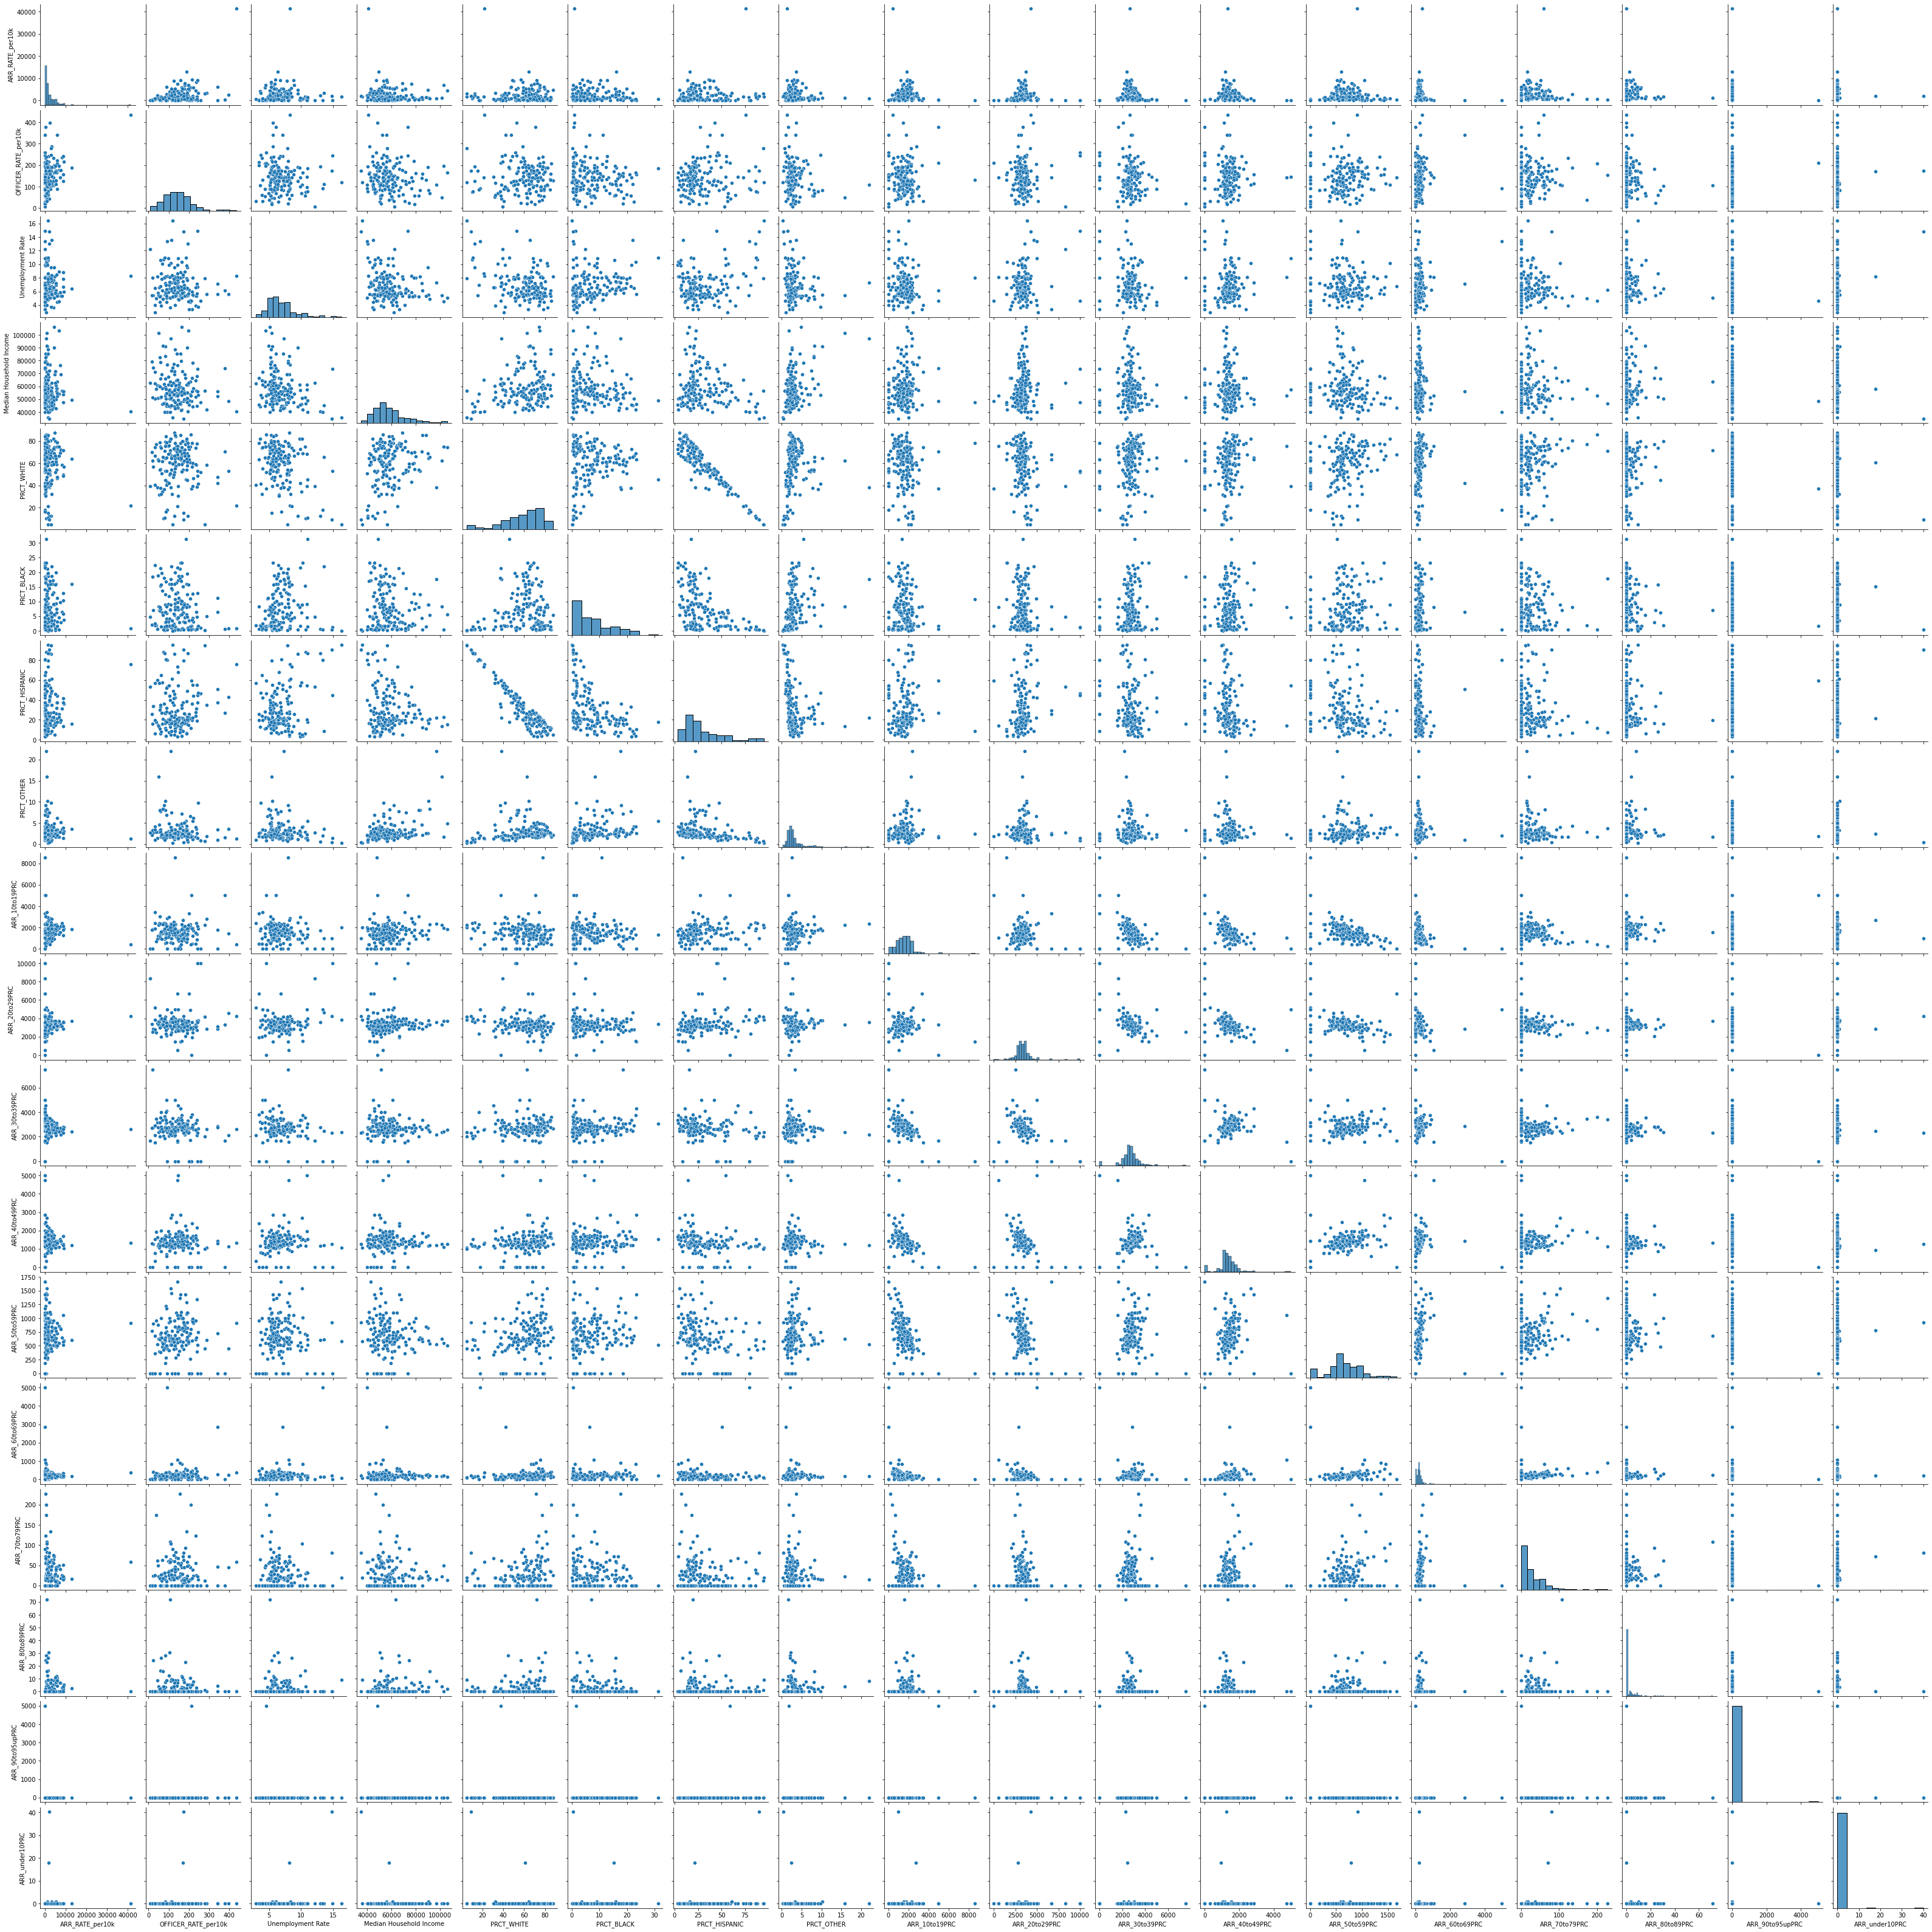

In [13]:
sns.pairplot(county_arr_agency_income)

In [14]:
x = county_arr_agency_income[['OFFICER_RATE_per10k', 
                                                    'Unemployment Rate','Median Household Income',
                                                     'PRCT_WHITE', 'PRCT_BLACK', 'PRCT_HISPANIC',
                                                     'PRCT_OTHER','ARR_10to19PRC','ARR_20to29PRC', 
                                                     'ARR_30to39PRC', 'ARR_40to49PRC', 'ARR_50to59PRC',
                                                     'ARR_60to69PRC', 'ARR_70to79PRC', 'ARR_80to89PRC', 
                                                     'ARR_90to95upPRC','ARR_under10PRC']]
y = county_arr_agency_income['ARR_RATE_per10k']

In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

pd.DataFrame(model.coef_, x.columns, columns = ['Coeff'])

,Coeff
OFFICER_RATE_per10k,3.025033e+01
Unemployment Rate,8.803823e+01
Median Household Income,-5.288507e-03
PRCT_WHITE,-4.709041e+01
PRCT_BLACK,-7.300097e+00
PRCT_HISPANIC,-1.344767e+01
PRCT_OTHER,5.435310e+01
ARR_10to19PRC,-8.106356e+08
ARR_20to29PRC,-8.106356e+08
ARR_30to39PRC,-8.106356e+08


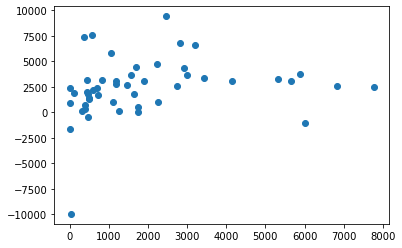

In [16]:
predictions = model.predict(x_test)
plt.scatter(y_test, predictions)

(array([ 3.,  2.,  7., 16., 11.,  5.,  1.,  1.,  1.,  1.]),
 array([-7020.95703125, -5319.91845703, -3618.87988281, -1917.84130859,
         -216.80273438,  1484.23583984,  3185.27441406,  4886.31298828,
         6587.3515625 ,  8288.39013672,  9989.42871094]),
 <BarContainer object of 10 artists>)

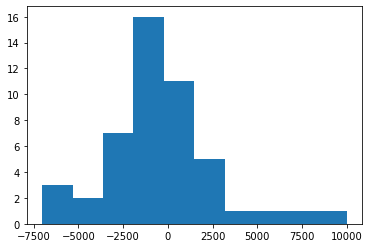

In [17]:
plt.hist(y_test - predictions)

In [18]:
tx_county_dems = pd.merge(tx_county_demographics,county_vars, left_on ='Area Name',right_on='County')
tx_county_dems.head()

,Area Name,Age,Total Pop Total,PRCT_WHITE,PRCT_BLACK,PRCT_HISPANIC,PRCT_OTHER,County,Median Household Income,Unemployment Rate,Drop Out Rate 7-12,Dept Family Services Budget
0,Anderson,< 10,5826,48.438036,18.142808,24.013045,9.406111,Anderson,50879,5.8,0.1,3215150.57
1,Anderson,10-19,6580,56.200608,14.407295,24.817629,4.574468,Anderson,50879,5.8,0.1,3215150.57
2,Anderson,20-29,8262,50.605180,24.824498,21.968046,2.602275,Anderson,50879,5.8,0.1,3215150.57
3,Anderson,30-39,9932,47.935965,28.080950,22.553363,1.429722,Anderson,50879,5.8,0.1,3215150.57
4,Anderson,40-49,8936,49.306177,27.473142,21.575649,1.645031,Anderson,50879,5.8,0.1,3215150.57


In [19]:
from sklearn import metrics
metrics.mean_absolute_error(y_test, predictions)

2296.928426106771

In [20]:
metrics.mean_squared_error(y_test, predictions)

10038666.18853875

In [21]:
np.sqrt(metrics.mean_squared_error(y_test, predictions))

3168.385422977885

In [22]:
#TRY 2
x = county_arr_agency_income[['OFFICER_RATE_per10k', 
                                                    'Unemployment Rate',
                                                     'PRCT_BLACK', 'PRCT_HISPANIC','ARR_70to79PRC']]
y = county_arr_agency_income['ARR_RATE_per10k']

In [23]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

pd.DataFrame(model.coef_, x.columns, columns = ['Coeff'])

,Coeff
OFFICER_RATE_per10k,25.283577
Unemployment Rate,65.475132
PRCT_BLACK,3.437640
PRCT_HISPANIC,17.106609
ARR_70to79PRC,11.599746


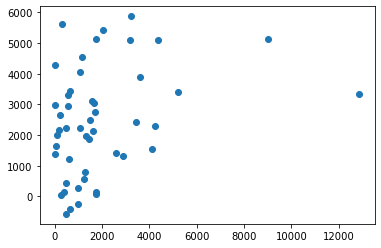

In [24]:
predictions = model.predict(x_test)
plt.scatter(y_test, predictions)

(array([ 2., 10., 11., 10., 12.,  1.,  1.,  0.,  0.,  1.]),
 array([-5338.1608213 , -3850.34166426, -2362.52250722,  -874.70335018,
          613.11580685,  2100.93496389,  3588.75412093,  5076.57327796,
         6564.392435  ,  8052.21159204,  9540.03074908]),
 <BarContainer object of 10 artists>)

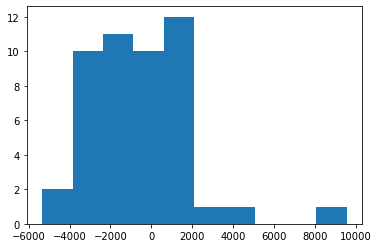

In [25]:
plt.hist(y_test - predictions)

In [26]:
from sklearn import metrics
metrics.mean_absolute_error(y_test, predictions)

1894.1905114283188

In [27]:
metrics.mean_squared_error(y_test, predictions)

6152027.029357919

In [28]:
r_sq = model.score(x, y)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.18004278582731648


In [ ]:
# dummy_age = pd.get_dummies(tx_county_dems['Age'])
# tx_county_dems = pd.merge(
#     left=tx_county_dems,
#     right=dummy_age,
#     left_index=True,
#     right_index=True,
# )
# tx_county_dems.head()

In [ ]:
tx_county_dems["JOIN"] = tx_county_dems["Area Name"] + tx_county_dems["Age"]
tx_county_dems.head()

In [ ]:
tx_arrestees = pd.read_csv("Jan8_TX_data_for_ML.csv")
tx_arrestees.head()

In [ ]:
tx_arrestees['AGE_GROUP'] = ""
tx_arrestees.loc[tx_arrestees['ARR_AGE_NUM'] < 10, 'AGE_GROUP'] = '< 10'
cond_10to19 = (tx_arrestees['ARR_AGE_NUM'] >= 10) & (tx_arrestees['ARR_AGE_NUM'] <= 19)
tx_arrestees.loc[cond_10to19, 'AGE_GROUP'] = '10-19'
cond_20to29 = (tx_arrestees['ARR_AGE_NUM'] >= 20) & (tx_arrestees['ARR_AGE_NUM'] <= 29)
tx_arrestees.loc[cond_20to29, 'AGE_GROUP'] = '20-29'
cond_30to39 = (tx_arrestees['ARR_AGE_NUM'] >= 30) & (tx_arrestees['ARR_AGE_NUM'] <= 39)
tx_arrestees.loc[cond_30to39, 'AGE_GROUP'] = '30-39'
cond_40to49 = (tx_arrestees['ARR_AGE_NUM'] >= 40) & (tx_arrestees['ARR_AGE_NUM'] <= 49)
tx_arrestees.loc[cond_40to49, 'AGE_GROUP'] = '40-49'
cond_50to59 = (tx_arrestees['ARR_AGE_NUM'] >= 50) & (tx_arrestees['ARR_AGE_NUM'] <= 59)
tx_arrestees.loc[cond_50to59, 'AGE_GROUP'] = '50-59'
cond_60to69 = (tx_arrestees['ARR_AGE_NUM'] >= 60) & (tx_arrestees['ARR_AGE_NUM'] <= 69)
tx_arrestees.loc[cond_60to69, 'AGE_GROUP'] = '60-69'
cond_70to79 = (tx_arrestees['ARR_AGE_NUM'] >= 70) & (tx_arrestees['ARR_AGE_NUM'] <= 79)
tx_arrestees.loc[cond_70to79, 'AGE_GROUP'] = '70-79'
cond_80to89 = (tx_arrestees['ARR_AGE_NUM'] >= 80) & (tx_arrestees['ARR_AGE_NUM'] <= 89)
tx_arrestees.loc[cond_80to89, 'AGE_GROUP'] = '80-89'
cond_90to95 = (tx_arrestees['ARR_AGE_NUM'] >= 90)
tx_arrestees.loc[cond_90to95, 'AGE_GROUP'] = '90-95+'

tx_arrestees.head()

In [ ]:
tx_arrestees = tx_arrestees[['AGE_GROUP','CRIME_AGAINST','SUSPECT_USING_ID','LOCATION_ID',
                             'INCIDENT_HOUR','INCIDENT_MONTH','AGENCY_ID']]
tx_arrestees.head()

In [ ]:
tx_county_agencies = pd.read_csv("2020_agencies.csv")
tx_county_agencies = tx_county_agencies[['AGENCY_ID','COUNTY_NAME']]
tx_county_agencies['COUNTY_NAME'] = tx_county_agencies['COUNTY_NAME'].str.title()
tx_county_agencies.dropna(inplace=True)
tx_county_agencies=tx_county_agencies[~tx_county_agencies['COUNTY_NAME'].str.contains(r';(?!$)')]

tx_county_agencies.head()

In [ ]:
tx_arrestees = pd.merge (tx_arrestees,tx_county_agencies,on='AGENCY_ID')
tx_arrestees['ARREST_COUNT'] = 1
tx_arrestees.head()

In [ ]:
tx_arrestees.columns

tx_arrests_1_group = tx_arrestees.groupby(['COUNTY_NAME','AGE_GROUP']).apply(pd.DataFrame.mode)
tx_arrests_1_group.head()

In [ ]:
df = tx_arrestees[['COUNTY_NAME','AGE_GROUP','ARREST_COUNT']]
df_2 = df .groupby(['COUNTY_NAME','AGE_GROUP']).sum()
df_2.head()
df_2.to_csv("df_2.csv",index=True)

In [ ]:
tx_arrestees_group = tx_arrestees[['COUNTY_NAME','AGE_GROUP','ARREST_COUNT']]
tx_arrestees_group = tx_arrestees_group.groupby(['COUNTY_NAME','AGE_GROUP']).sum()
tx_arrestees_group.head()

In [ ]:
tx_arrestees_group.to_csv('tx_arrestees_group.csv',index=True)
tx_arrestees_group_2 = pd.read_csv("tx_arrestees_group.csv")
tx_arrestees_group_2.head(15)

In [ ]:
tx_arrestees_group_2['JOIN'] = tx_arrestees_group_2['COUNTY_NAME'] + tx_arrestees_group_2['AGE_GROUP']
tx_arrestees_group_2.head()

In [ ]:
tx_arrests_rate_df = pd.merge(tx_county_dems,tx_arrestees_group_2,on='JOIN')
tx_arrests_rate_df.head()

In [ ]:
tx_arrests_rate_df["ARREST_RATE"] = ((tx_arrests_rate_df["ARREST_COUNT"]/tx_arrests_rate_df["Total Pop Total"])*10000).round(decimals=0)
tx_arrests_rate_df.head()

In [ ]:
tx_arrests_rate_df.columns

In [ ]:
tx_arrests_rate_df = tx_arrests_rate_df[['ARREST_RATE','PRCT_WHITE', 'PRCT_BLACK',
       'PRCT_HISPANIC', 'PRCT_OTHER','Median Household Income',
       'Unemployment Rate', 'Drop Out Rate 7-12',
       'Dept Family Services Budget', 'JOIN','County']]
tx_arrests_rate_df.head()

In [ ]:
tx_arrests_rate_df_group = tx_arrests_rate_df.groupby(['County']).mean()

In [ ]:
tx_arrests_rate_df_group.head()

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression

In [ ]:
X = tx_arrests_rate_df_group[['PRCT_WHITE','Unemployment Rate']]
y = tx_arrests_rate_df_group['ARREST_RATE']

In [ ]:
tx_arrests_rate_df_group.columns

In [ ]:
model = LinearRegression()

In [ ]:
model = LinearRegression().fit(X, y)

In [ ]:
r_sq = model.score(X, y)
print('coefficient of determination:', r_sq)